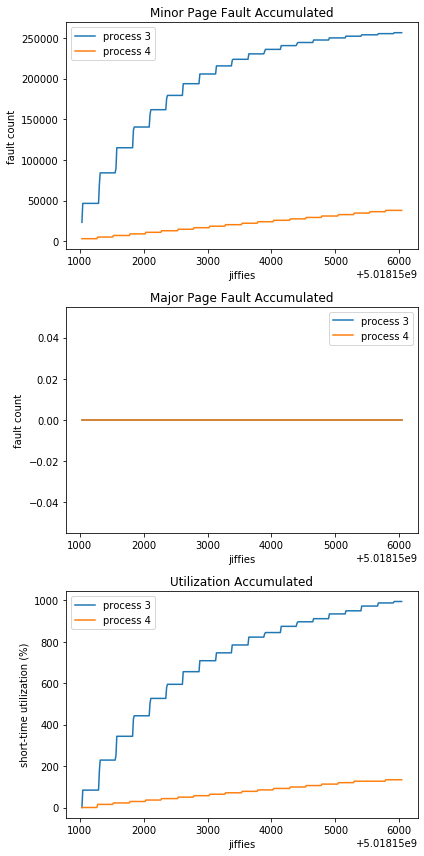

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import einops

with open("case1-2.txt", "r", encoding="UTF-8") as file:
    data = dict()
    for line in file:
        numbers = line.split(" ")
        if not numbers[0].isdigit():
            break
        numbers = list(map(int, numbers))
        if numbers[0] not in data:
            data.update({int(numbers[0]): [numbers[1:4]]})
        else:
            data[numbers[0]].append(numbers[1:4])
    jiffies = []
    minor = []
    major = []
    util = []

    for k, v in data.items():
        jiffies.append(k)
        minor.append([v[i][0] for i in range(len(v))])
        major.append([v[i][1] for i in range(len(v))])
        util.append([v[i][2] for i in range(len(v))])

    
    #print(np.array(minor[:-9]).T)
    #plt.plot(np.array(minor[:-7])[:,1])
    #plt.axis([jiffies[0], jiffies[-7], 0, 30000])
    
    fig, subfigs = plt.subplots(nrows=3)
    
    cum_minor = []
    minor_plot_lines = []
    for i in range(len(minor) - 11):
        cum_minor.append(np.sum(minor[:i+1], axis=0))
    
    for i in range(len(minor[0])):
        minor_plot_lines.append(subfigs[0].plot(jiffies[:-11], np.array(cum_minor)[:,i])[0])
    subfigs[0].set_title("Minor Page Fault Accumulated")
    subfigs[0].set_xlabel("jiffies")
    subfigs[0].set_ylabel("fault count")
    subfigs[0].legend(minor_plot_lines, ["process 3", "process 4"])#, "process 3", "process 4", "process 5", "process 6", "process 7", "process 8", "process 9", "process 10"])#, "process 11"])    
        
    cum_major = []
    major_plot_lines = []
    for i in range(len(major) - 11):
        cum_major.append(np.sum(major[:i+1], axis=0))
    
    for i in range(len(major[0])):
        major_plot_lines.append(subfigs[1].plot(jiffies[:-11], np.array(cum_major)[:,i])[0])
    subfigs[1].set_title("Major Page Fault Accumulated")
    subfigs[1].set_xlabel("jiffies")
    subfigs[1].set_ylabel("fault count")
    subfigs[1].legend(major_plot_lines, ["process 3", "process 4"])#, "process 3", "process 4", "process 5", "process 6", "process 7", "process 8", "process 9", "process 10"])#, "process 11"])
    
    cum_util = []
    util_plot_lines = []
    for i in range(len(util) - 11):
        cum_util.append(np.sum(util[:i+1], axis=0))
    
    for i in range(len(util[0])):
        util_plot_lines.append(subfigs[2].plot(jiffies[:-11], np.array(cum_util)[:,i])[0])
    subfigs[2].set_title("Utilization Accumulated")
    subfigs[2].set_xlabel("jiffies")
    subfigs[2].set_ylabel("short-time utilization (%)")
    subfigs[2].legend(util_plot_lines, ["process 3", "process 4"])#, "process 3", "process 4", "process 5", "process 6", "process 7", "process 8", "process 9", "process 10"])#, "process 11"])
    
        
    fig.set_size_inches(6, 12)
    fig.tight_layout()
    plt.show()
    
    #fig.savefig('case1-2.png')

        
        
        
    